Libraly import

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import numpy as np

Import data set, Mushroom data set

In [177]:
df = pd.read_csv("mushrooms.csv")
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Attribute discription from Kaggle:

cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

cap-shape: bell=b, conical=c, convex=x, flat=f ,knobbed=k, sunken=s

cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s

cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

bruises: bruises=t, no=f

odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

gill-attachment: attached=a, descending=d, free=f, notched=n 

gill-spacing: close=c, crowded=w, distant=d

gill-size: broad=b, narrow=n

gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

stalk-shape: enlarging=e, tapering=t

stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s

stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s

stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

veil-type: partial=p, universal=u

veil-color: brown=n, orange=o, white=w, yellow=y

ring-number: none=n, one=o, two=t

ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

In [179]:
print(f"sum of duplicate column: {sum(df.duplicated())}")
print("Data attribute list")
df.describe().T

sum of duplicate column: 0
Data attribute list


,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


From Table, drop a veil-type because it have only one feature.

In [180]:
#counting Null
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [181]:
for i in df.columns:
    missing = len(df[df[i]=='?'])
    percentage = missing / len(df) *100
    print(f'Missing data of {i} is: {missing}, {percentage:.2f} % of all data')


Missing data of class is: 0, 0.00 % of all data
Missing data of cap-shape is: 0, 0.00 % of all data
Missing data of cap-surface is: 0, 0.00 % of all data
Missing data of cap-color is: 0, 0.00 % of all data
Missing data of bruises is: 0, 0.00 % of all data
Missing data of odor is: 0, 0.00 % of all data
Missing data of gill-attachment is: 0, 0.00 % of all data
Missing data of gill-spacing is: 0, 0.00 % of all data
Missing data of gill-size is: 0, 0.00 % of all data
Missing data of gill-color is: 0, 0.00 % of all data
Missing data of stalk-shape is: 0, 0.00 % of all data
Missing data of stalk-root is: 2480, 30.53 % of all data
Missing data of stalk-surface-above-ring is: 0, 0.00 % of all data
Missing data of stalk-surface-below-ring is: 0, 0.00 % of all data
Missing data of stalk-color-above-ring is: 0, 0.00 % of all data
Missing data of stalk-color-below-ring is: 0, 0.00 % of all data
Missing data of veil-type is: 0, 0.00 % of all data
Missing data of veil-color is: 0, 0.00 % of all data

Drop a Missing row

In [182]:
df = df.drop(df[df['stalk-root'] == '?'].index)
print(f"sum of duplicate column: {sum(df.duplicated())}")
print("Data attribute list")
df.describe().T

sum of duplicate column: 0
Data attribute list


,count,unique,top,freq
class,5644,2,e,3488
cap-shape,5644,6,x,2840
cap-surface,5644,4,y,2220
cap-color,5644,8,g,1696
bruises,5644,2,t,3184
odor,5644,7,n,2776
gill-attachment,5644,2,f,5626
gill-spacing,5644,2,c,4620
gill-size,5644,2,b,4940
gill-color,5644,9,p,1384


Feature Distribution plot

C:\Users\siriw\AppData\Local\Temp\ipykernel_19732\165367498.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


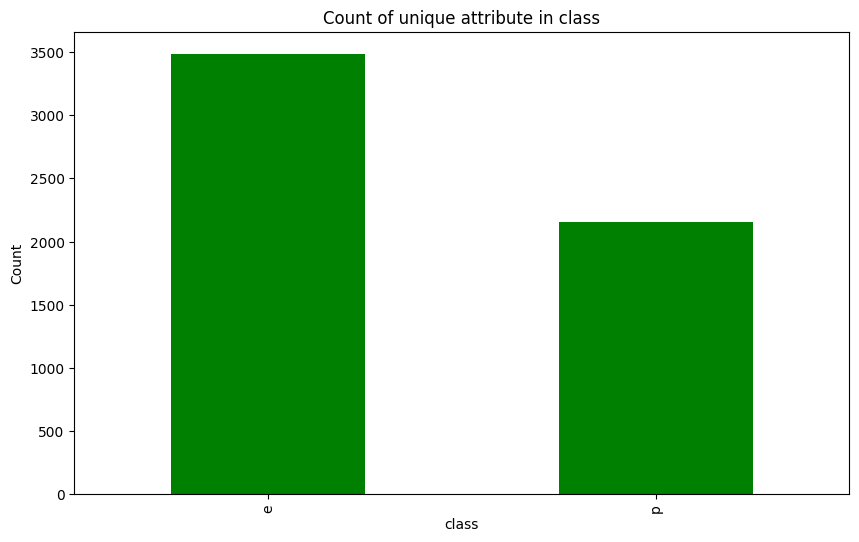

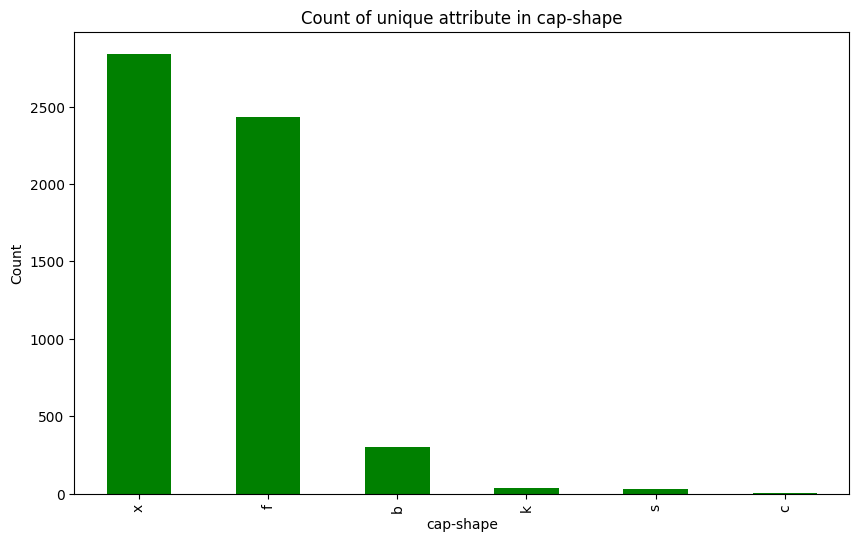

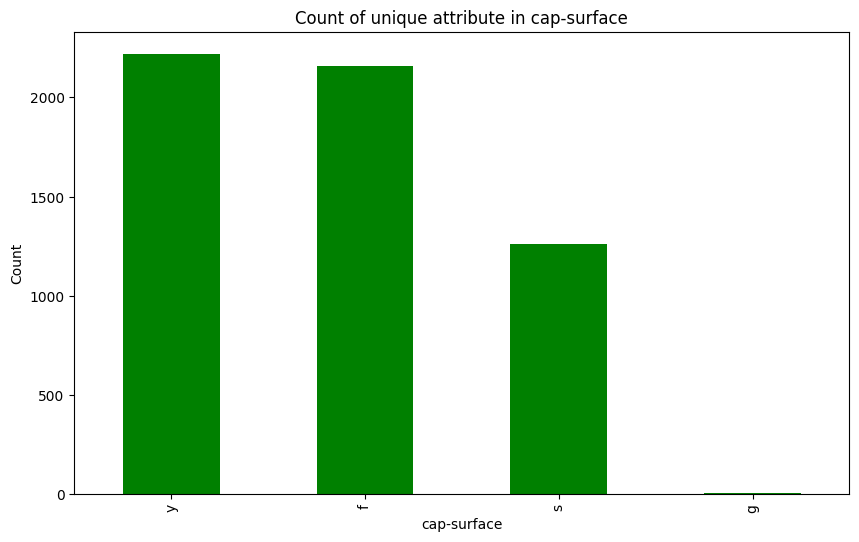

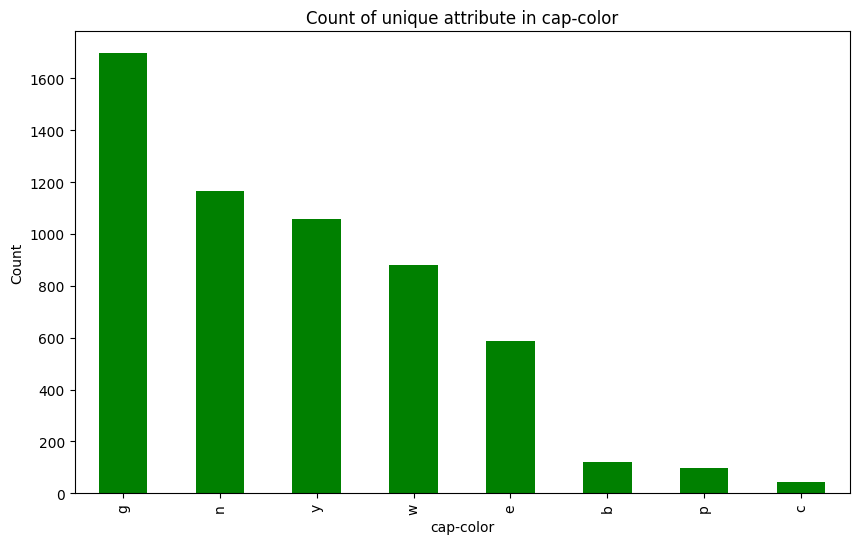

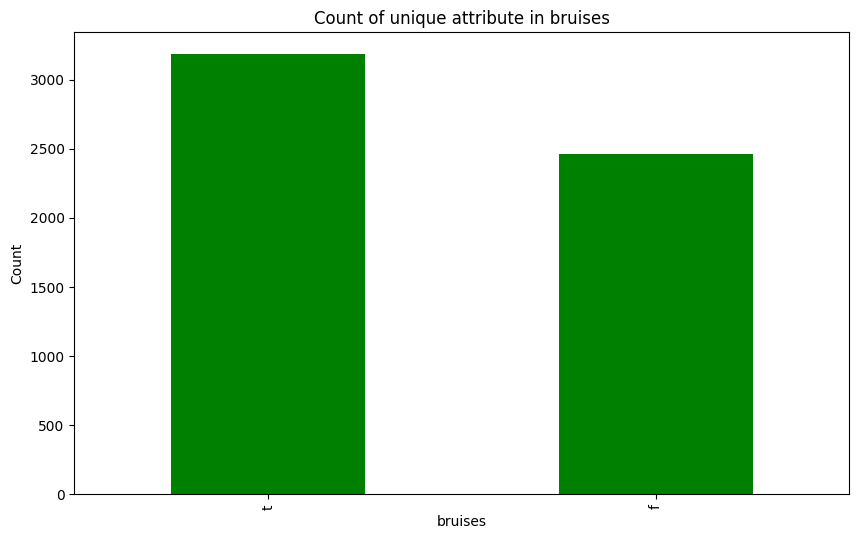

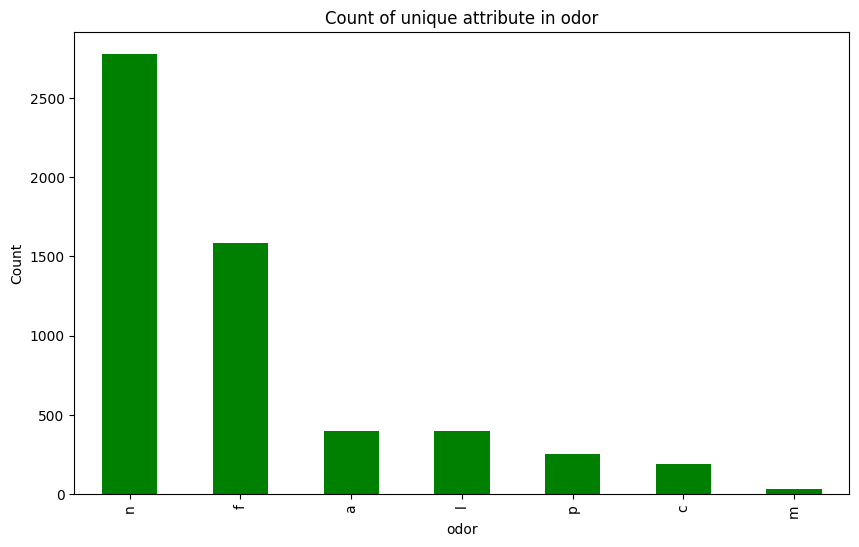

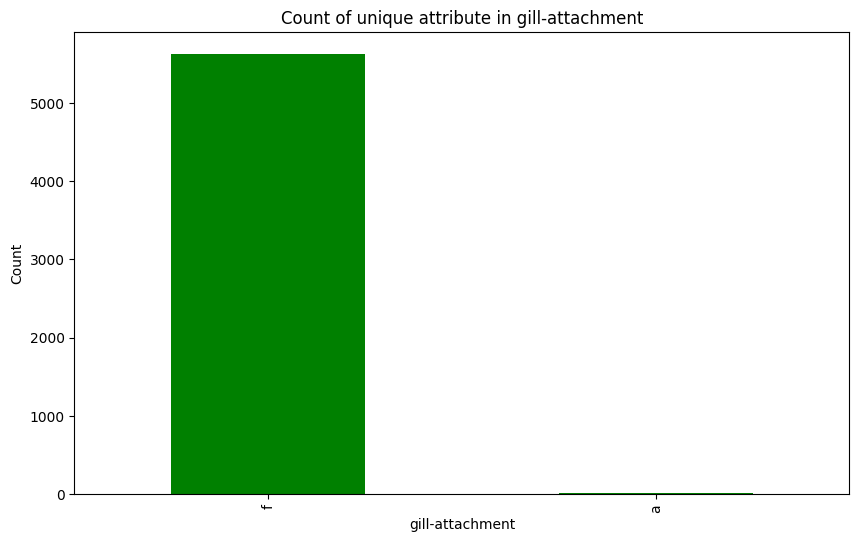

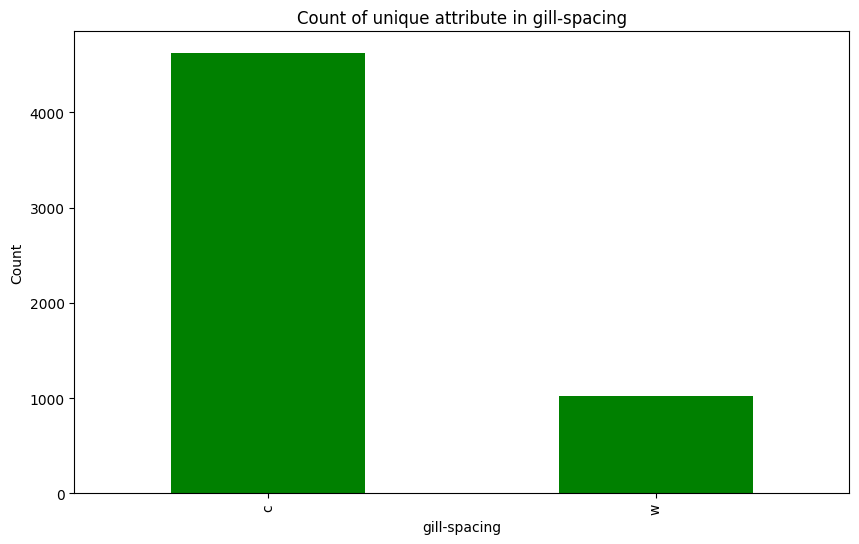

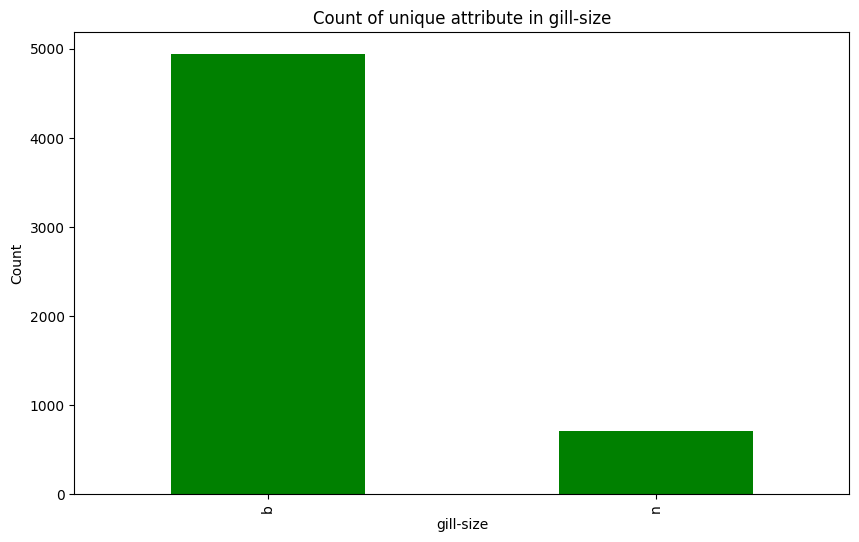

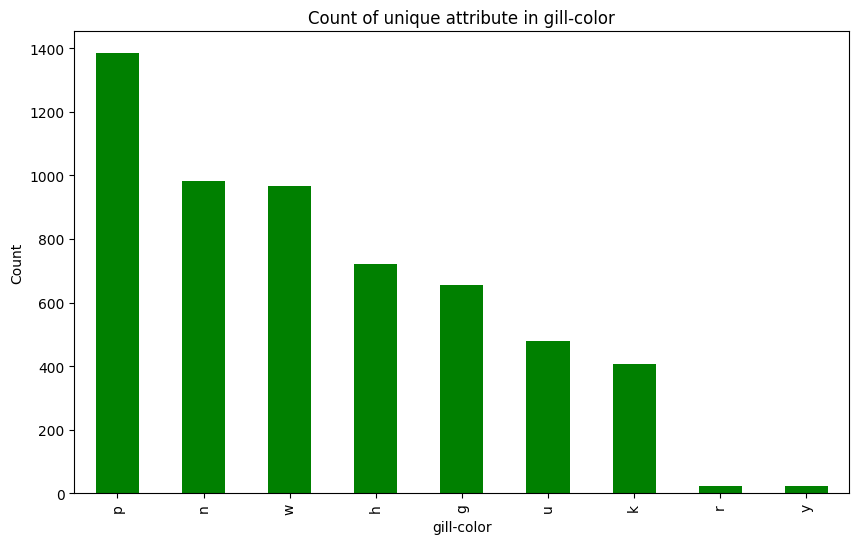

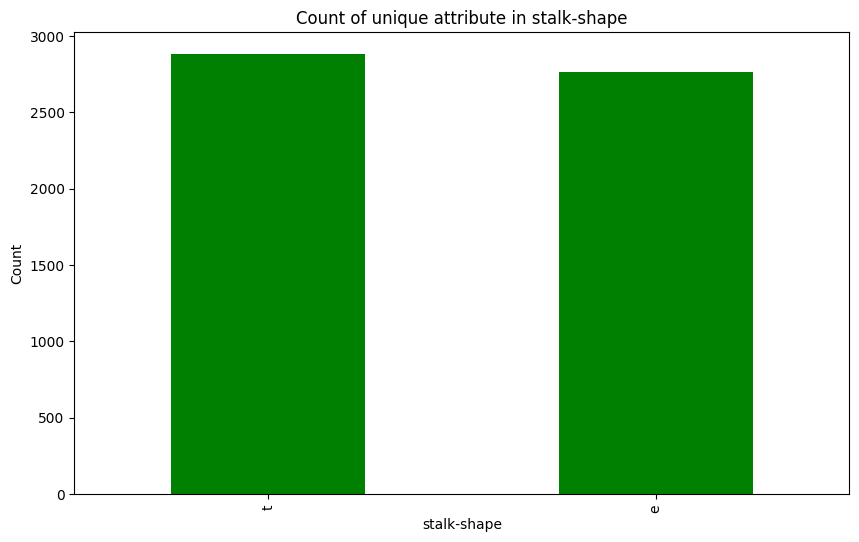

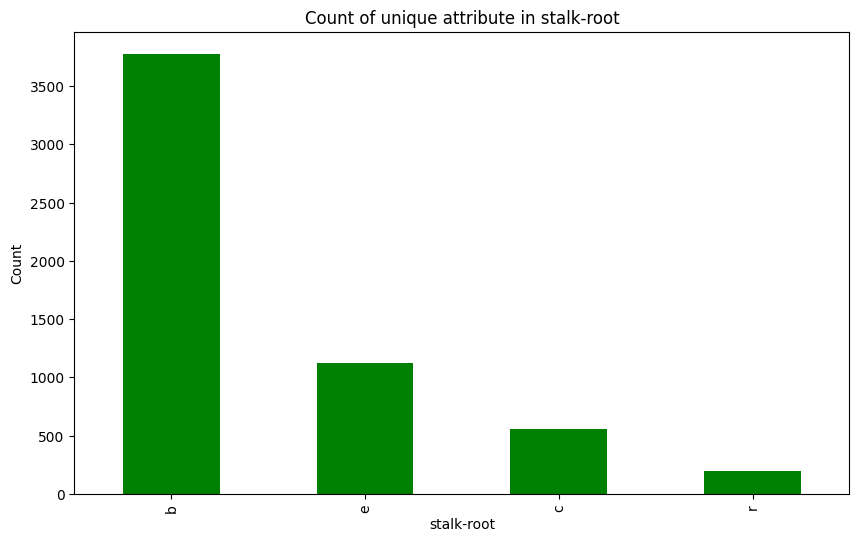

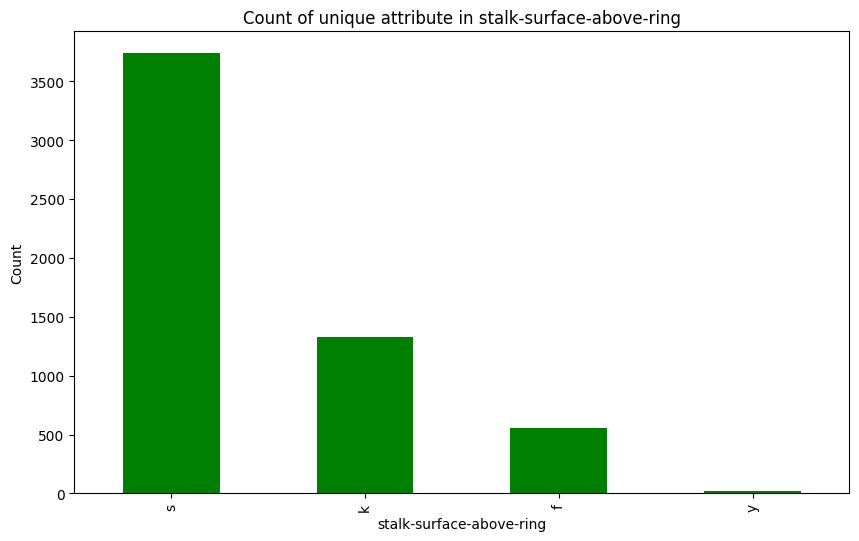

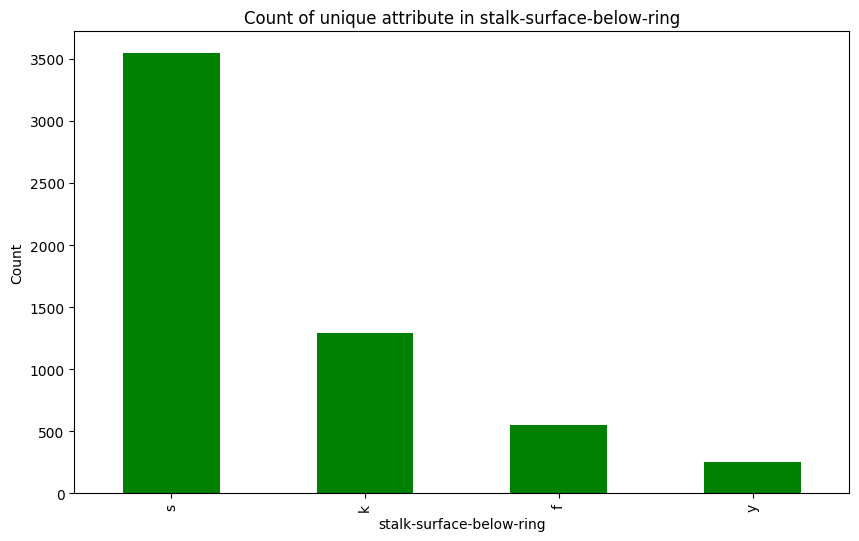

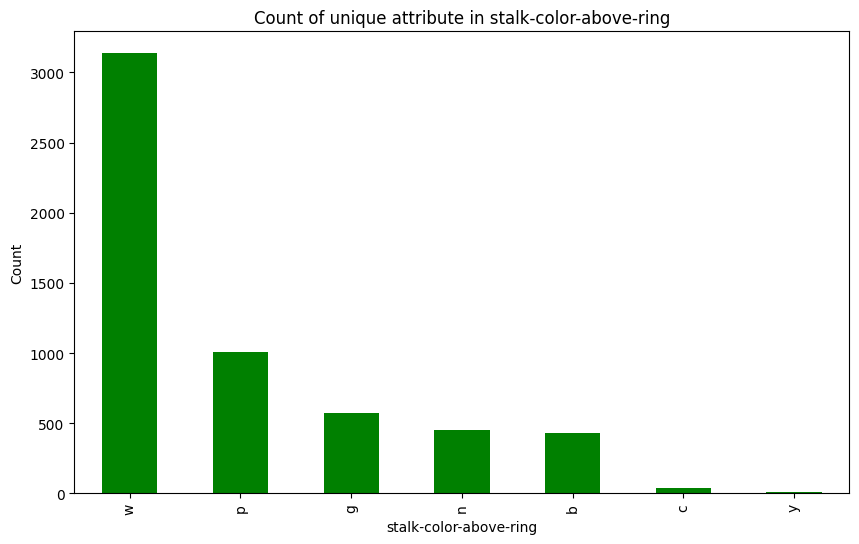

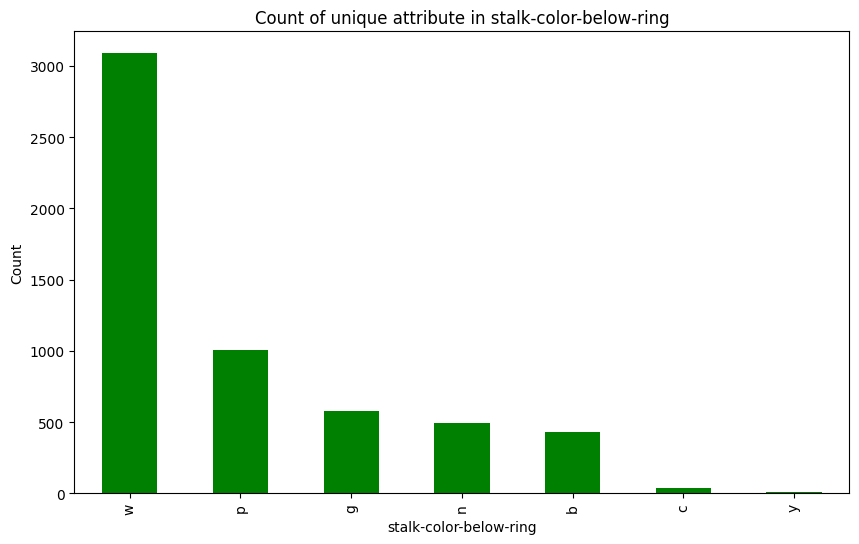

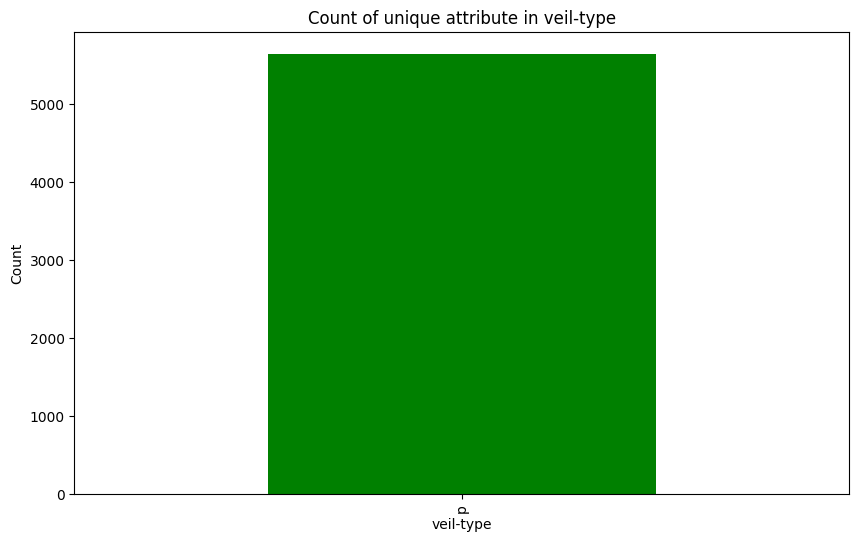

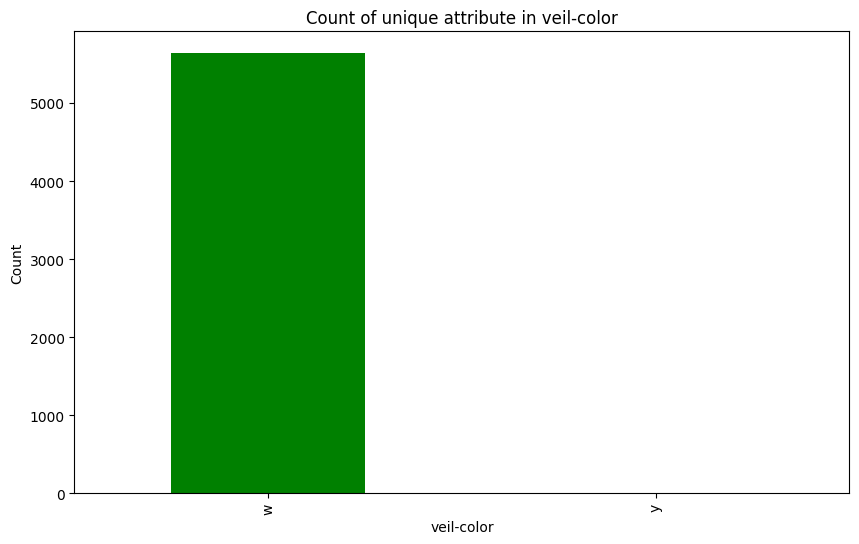

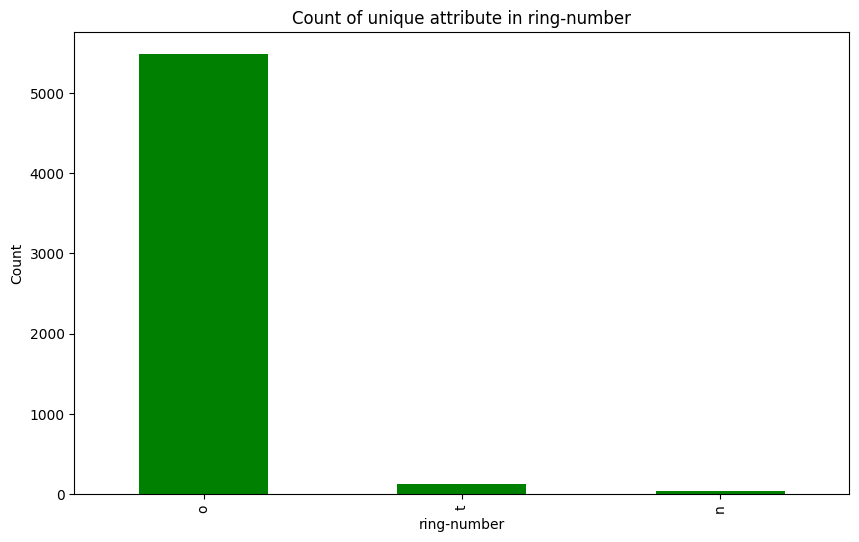

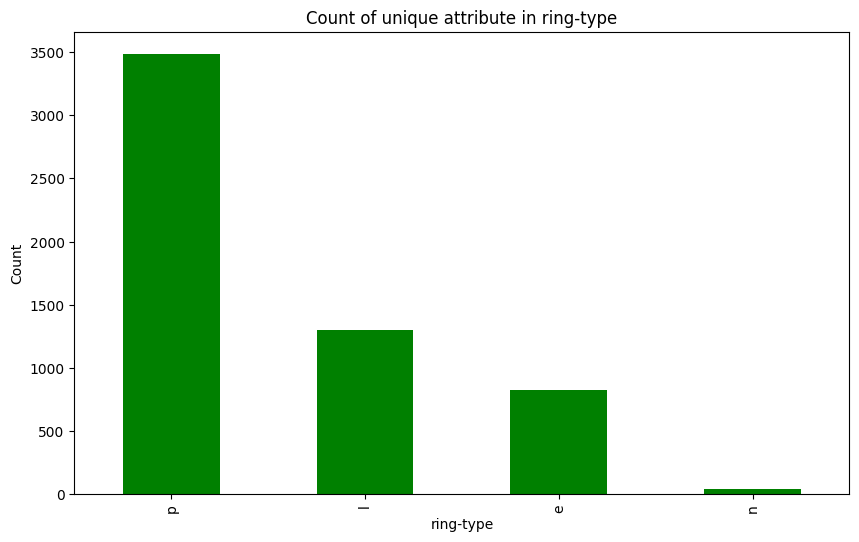

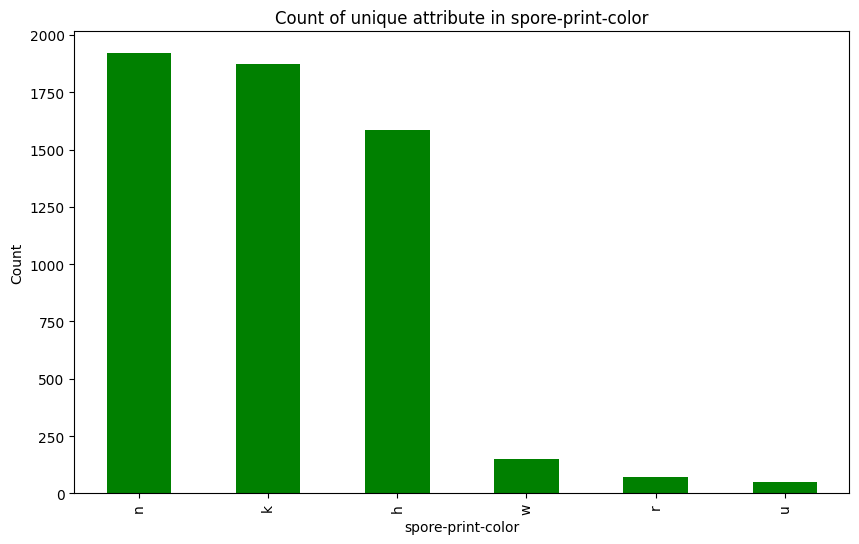

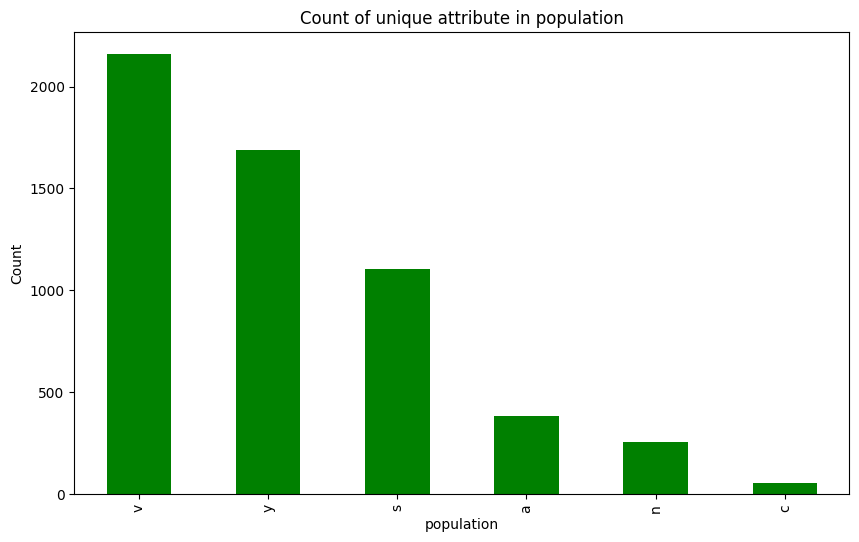

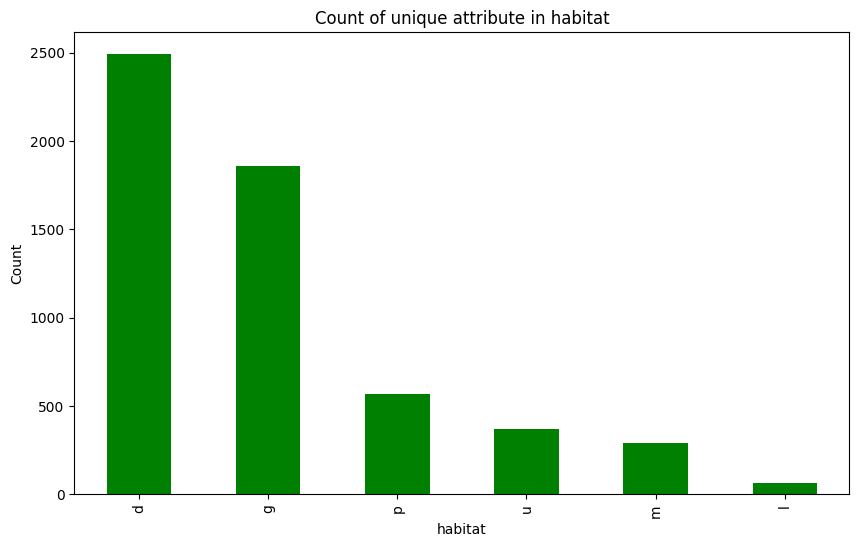

In [183]:
for attribute in df.columns:
    counting = df[attribute].value_counts()

    plt.figure(figsize=(10, 6))
    counting.plot(kind = 'bar', color ='green')
    plt.title(f'Count of unique attribute in {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Count')

Drop column from unique feature in each below attribution:
    - gill-atteachment
    - ring-number
    - veil-color
    - veil-type

In [184]:
df = df.drop(['gill-attachment', 'ring-number', 'veil-color', 'veil-type'], axis=1)

Print Correlation heatmep

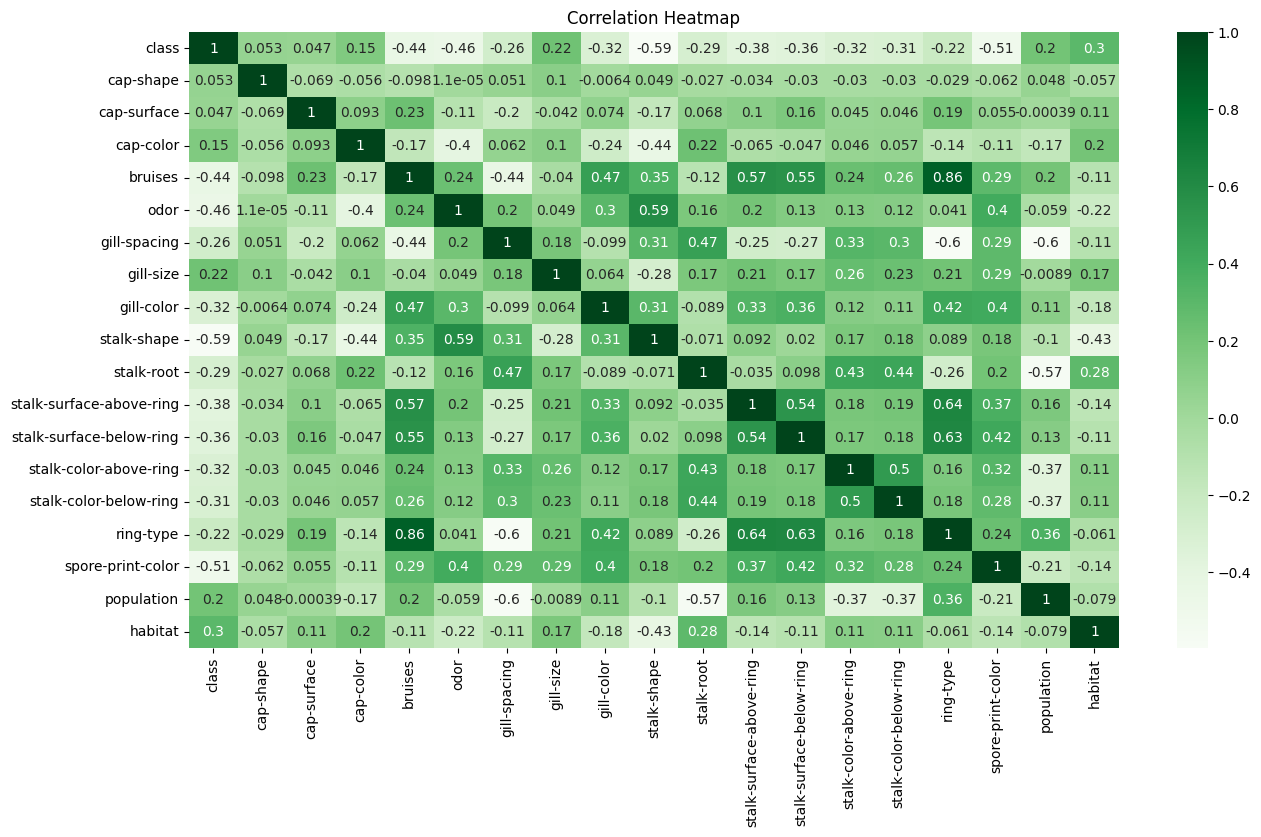

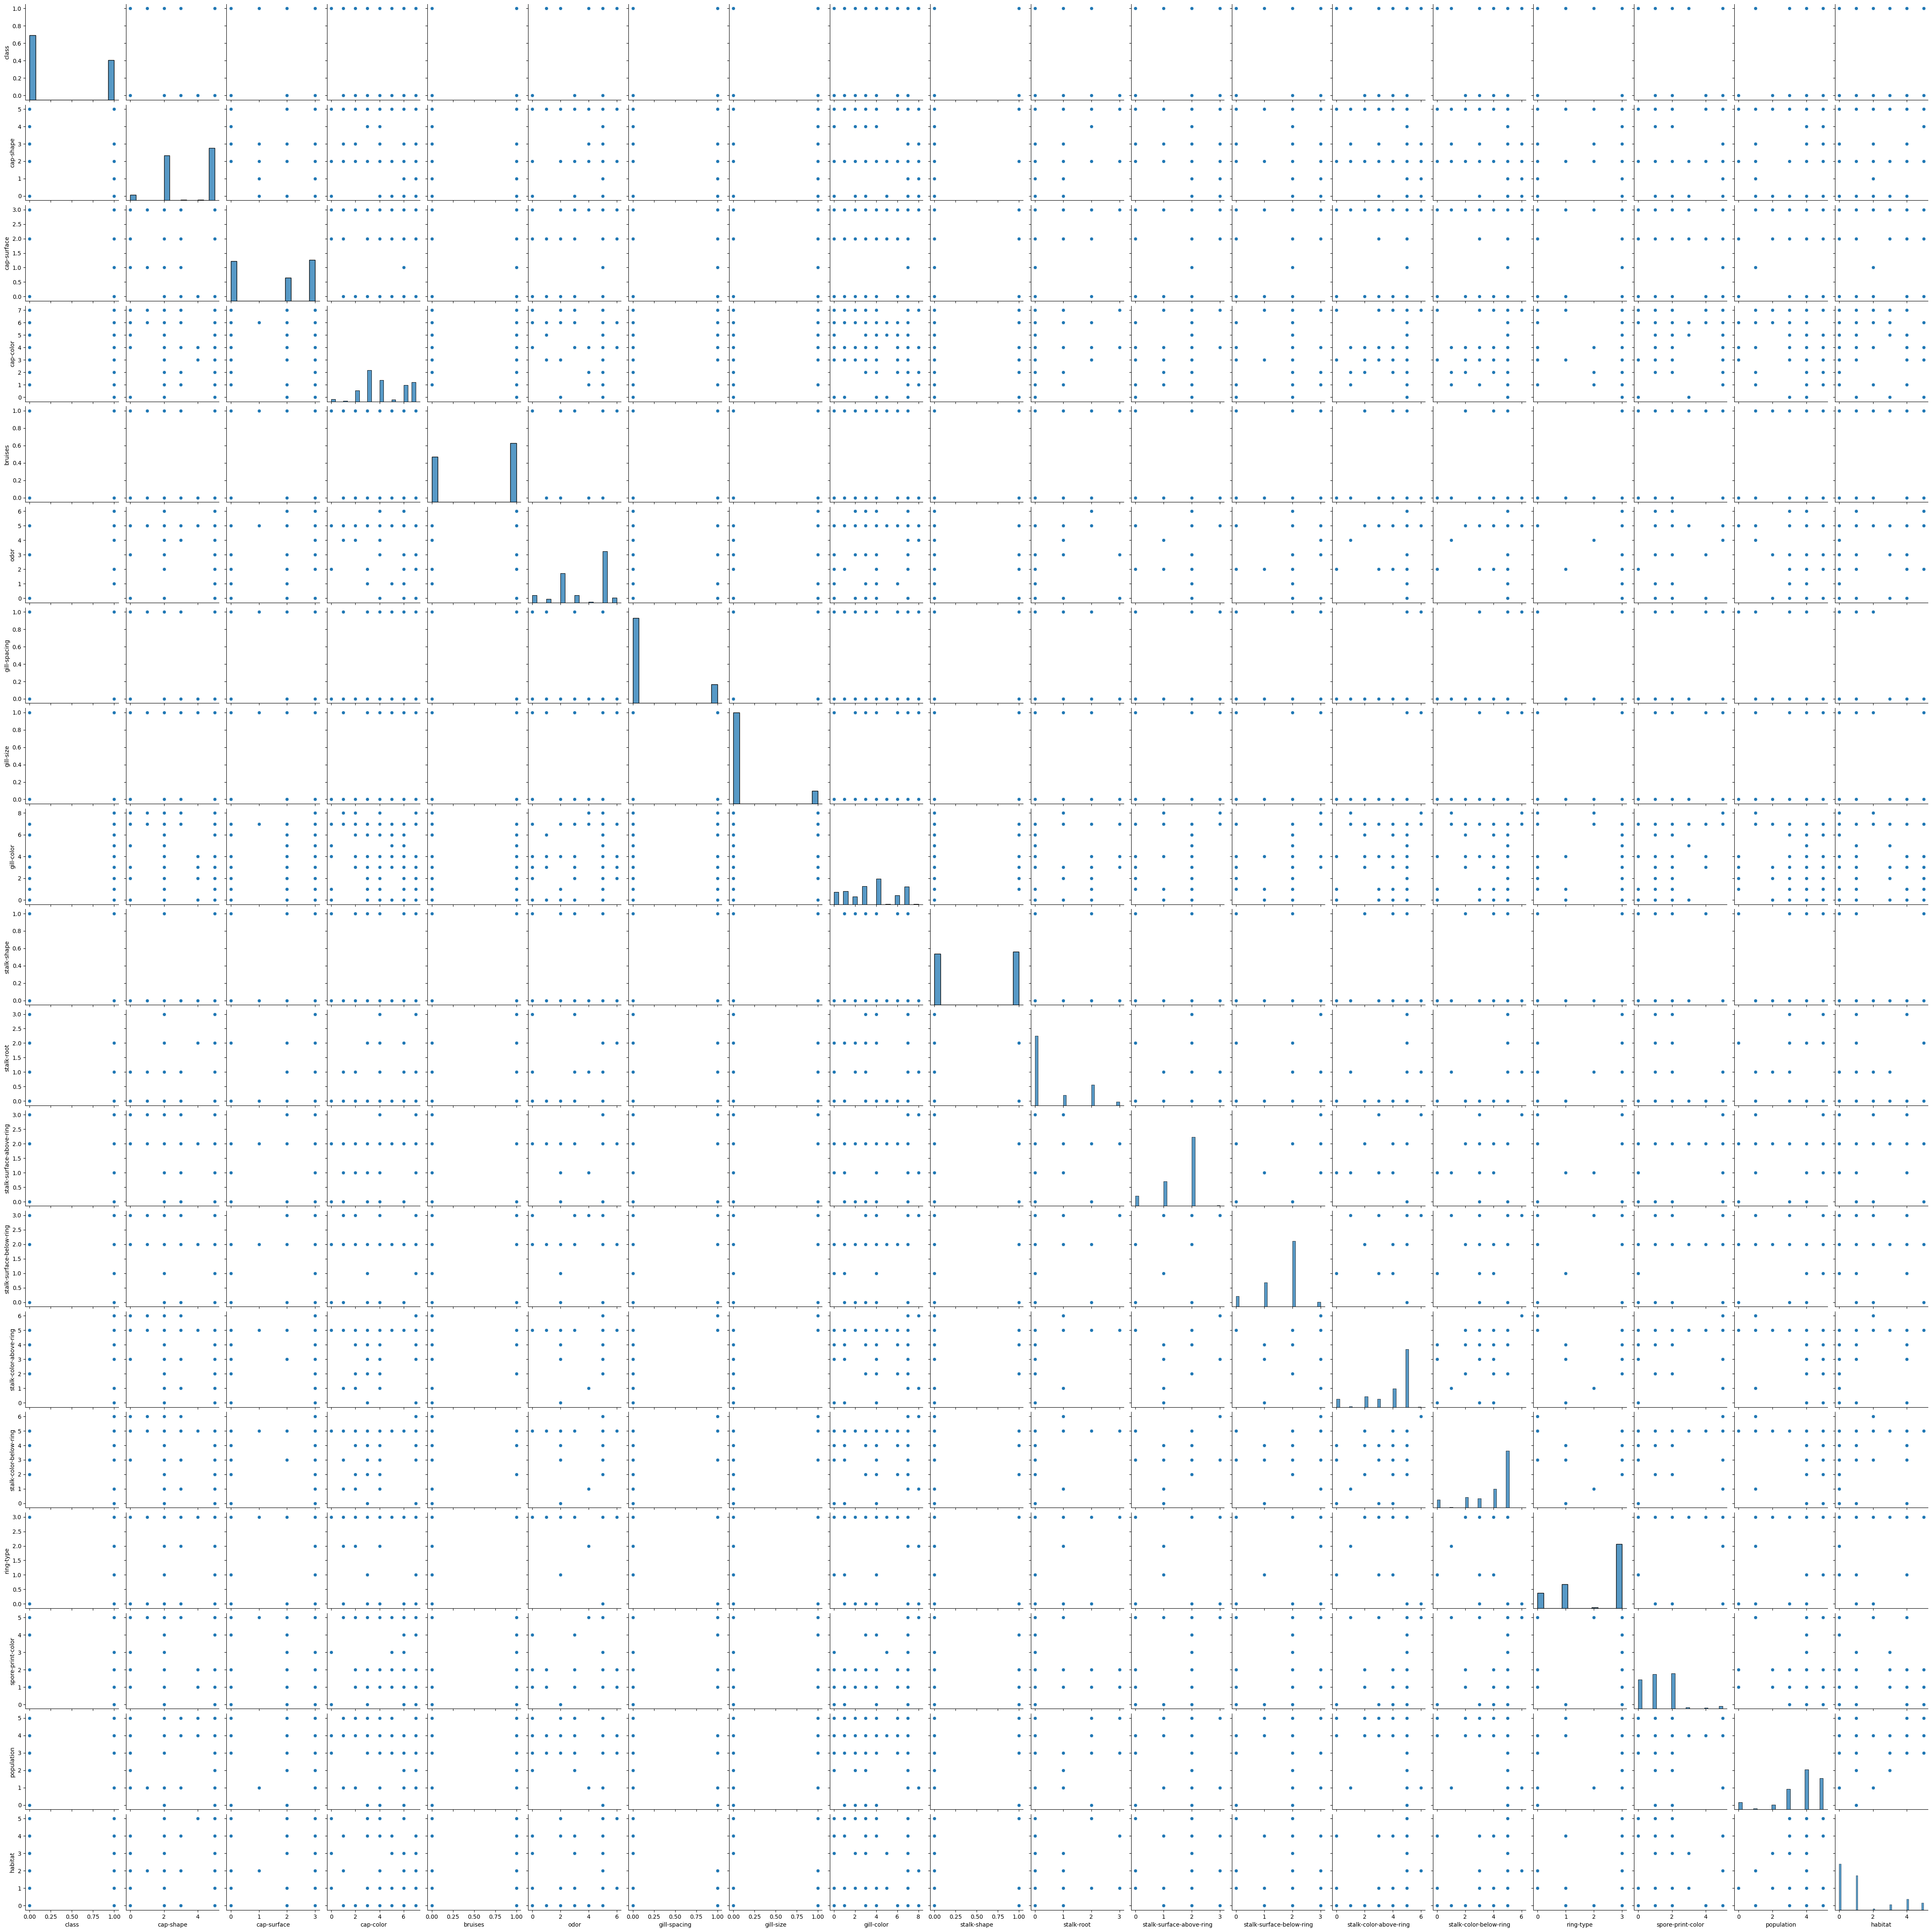

In [188]:
#Encode data
df_encode = df.apply(LabelEncoder().fit_transform)

plt.figure(figsize=(15, 8))

sb.heatmap(df_encode.corr(), annot= True, cbar = True, cmap= 'Greens')

plt.title('Correlation Heatmap')

plt.show()

from warnings import filterwarnings
#Pair plot
filterwarnings("ignore", category=FutureWarning)

sb.pairplot(df_encode)

In [189]:
df.to_csv('file1.csv')